# Base Tumor Growth Inhibition Models

Basic simulations of the TGI model, in different parameter regimes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from treatment_sequencing import GrowthInhibitionModel


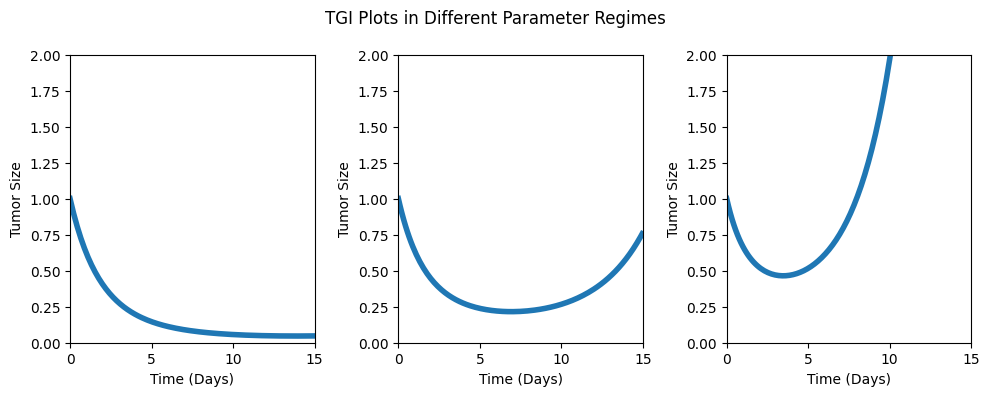

In [2]:
V0 = 1; gamma0 = 1; t_max = 15
lambda_vals = [0.5, 0.5, 0.5]
epsilon_vals = [0.05, 0.1, 0.2]

fig, axs = plt.subplots(1, 3, figsize=(10, 4))

for i, ax in enumerate(axs):
    params = {'lambda': lambda_vals[i], 'epsilon': epsilon_vals[i], 'V0': V0, 'gamma0': gamma0}
    model = GrowthInhibitionModel(params=params, method='Radau', dt = 0.11)
    model.simulate(t_max=t_max)
    model.plot(ax=ax, linewidth=4)
    ax.set_ylim([0, 2]); ax.set_xlim(0, t_max)
    
plt.suptitle("TGI Plots in Different Parameter Regimes"); plt.tight_layout()

In [3]:
def find_intersection_index(series, val):
    # Find the closest index of a series to a given value.
    # Assumes a monotonic series (will find first crossing otherwise)
    
    series_diff = series - val
    if series.iloc[0] < val:  # Transform series so it decreases to value
        series_diff *= -1
        
    return series_diff.lt(0).idxmax()

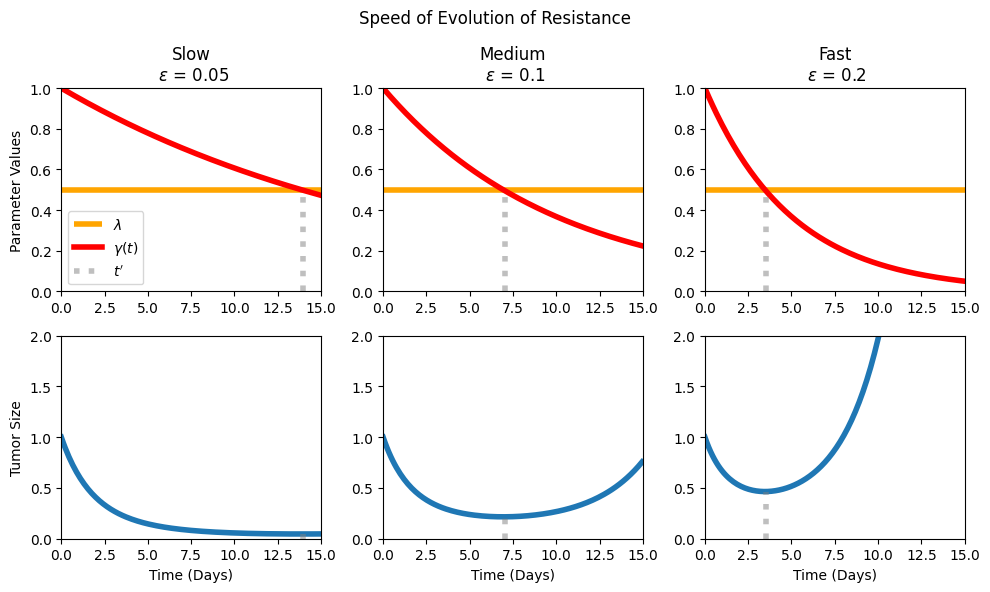

In [4]:
titles = ['Slow', 'Medium', 'Fast']
lw = 4  # Linewidth parameter

fig, axs = plt.subplots(2, 3, figsize=(10, 6))

for i, title in enumerate(titles):
    params = {'lambda': lambda_vals[i], 'epsilon': epsilon_vals[i], 'V0': V0, 'gamma0': gamma0}
    model = GrowthInhibitionModel(params=params, method='Radau', dt = 0.11)
    model.simulate(t_max=t_max)
    model.plot(ax=axs[1][i], linewidth=lw, decorate_axes=False)
    axs[1][i].set_xlabel('Time (Days)')
    
    axs[0][i].set_ylim([0, gamma0]); axs[0][i].set_xlim(0, t_max)
    axs[1][i].set_ylim([0, 2 * V0]); axs[1][i].set_xlim(0, t_max)
    
    axs[0][i].hlines(xmin=0, xmax=t_max, y=lambda_vals[i], linewidth=lw, color='orange', label = r"$\lambda$")
    axs[0][i].plot(model.results_df.Time, model.results_df.gamma, linewidth=lw, color='r', label = r"$\gamma(t)$")
    axs[0][i].set_title(title + f"\n $\epsilon$ = {epsilon_vals[i]}")
    
    intersection_index = find_intersection_index(model.results_df.gamma, lambda_vals[i])
    axs[0][i].vlines(ymin=0, ymax=lambda_vals[i], x=model.results_df.Time.iloc[intersection_index],
                     linewidth=lw, linestyle=':', color='gray', alpha=0.5, label = r"$t^{\prime}$")
    axs[1][i].vlines(ymin=0, ymax=model.results_df.V.iloc[intersection_index], x=model.results_df.Time.iloc[intersection_index],
                     linewidth=lw, linestyle=':', color='gray', alpha=0.5)
    
axs[0][0].legend(loc=3); axs[0][0].set_ylabel('Parameter Values') ; axs[1][0].set_ylabel('Tumor Size')  
plt.suptitle("Speed of Evolution of Resistance"); plt.tight_layout()
plt.savefig("images/TGI_evolution_speed.png")